# Text Mining with NLTK

## Python setup

You will need to install some modules in a Anaconda environment of your choice:

---

[NLTK](https://www.nltk.org/) (Natural Language Toolkit) 

```bash
conda install nltk
```

---

[Wordcloud](https://amueller.github.io/word_cloud/):

```bash
conda install wordcloud
```

---

We need the following modules:

- NLTK
- Wordcloud
- Pandas
- Altair

In [3]:
# we suppress some unimportant warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

### Data import

In [4]:
import pandas as pd

# Import some Tweets from Elon Musk 
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets.csv")

df.head(3)

Unnamed: 0                created_at                   id  author_id  \
0           0  2021-12-10T07:20:45.000Z  1469205428227784711   44196397   
1           1  2021-12-10T07:19:05.000Z  1469205011687223298   44196397   
2           2  2021-12-10T06:44:19.000Z  1469196261953884160   44196397   

                            text  
0  @Albi_SideArms maybe i will …  
1  @jack https://t.co/ueyR6NAwap  
2              @SawyerMerritt 🤣🤣

### Data corrections

In [5]:
df['text'] = df['text'].astype(str).str.lower()

df.head(3)

Unnamed: 0                created_at                   id  author_id  \
0           0  2021-12-10T07:20:45.000Z  1469205428227784711   44196397   
1           1  2021-12-10T07:19:05.000Z  1469205011687223298   44196397   
2           2  2021-12-10T06:44:19.000Z  1469196261953884160   44196397   

                            text  
0  @albi_sidearms maybe i will …  
1  @jack https://t.co/ueyr6nawap  
2              @sawyermerritt 🤣🤣

In [10]:
df['created_at'] = pd.to_datetime(df['created_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  72 non-null     int64              
 1   created_at  72 non-null     datetime64[ns, UTC]
 2   id          72 non-null     int64              
 3   author_id   72 non-null     int64              
 4   text        72 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 2.9+ KB


## Text mining data preparation

### Tokenization


- We use NLTK's [RegexpTokenizer](https://www.nltk.org/_modules/nltk/tokenize/regexp.html) to perform [tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) in combination with regular expressions. 

- To learn more about regular expressions ("regexp"), visit the following sites:


- [regular expression basics](https://www.w3schools.com/python/python_regex.asp).
- [interactive regular expressions tool](https://regex101.com/)


- `\w+` matches Unicode word characters with one or more occurrences; 
- this includes most characters that can be part of a word in any language, as well as numbers and the underscore.

In [12]:
from nltk.tokenize import RegexpTokenizer

Hint

---

```python

regexp = RegexpTokenizer('___') # use regular expression to match (multiple) word characters and numbers

df['text_token']=df['___'].apply(___.tokenize) # insert the data column and the regular expression pattern

```

---


In [13]:
### BEGIN SOLUTION
regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
### END SOLUTION

In [14]:
df.head()

Unnamed: 0                created_at                   id  author_id  \
0           0 2021-12-10 07:20:45+00:00  1469205428227784711   44196397   
1           1 2021-12-10 07:19:05+00:00  1469205011687223298   44196397   
2           2 2021-12-10 06:44:19+00:00  1469196261953884160   44196397   
3           3 2021-12-10 04:42:00+00:00  1469165476911755264   44196397   
4           4 2021-12-10 04:21:25+00:00  1469160298158383109   44196397   

                                               text  \
0                     @albi_sidearms maybe i will …   
1                     @jack https://t.co/ueyr6nawap   
2                                 @sawyermerritt 🤣🤣   
3  @sawyermerritt tesla china has done amazing work   
4                                        @mrbeast 🙏   

                                          text_token  
0                    [albi_sidearms, maybe, i, will]  
1                   [jack, https, t, co, ueyr6nawap]  
2                                    [sawyermerritt]  
3  [sawyermerritt, tesla, china, has, done, amazi...  
4                                          [mrbeast]

In [10]:
# Check your code
assert df.iloc[0, 5] == ['albi_sidearms', 'maybe', 'i', 'will']


*Compare the entries of `text` with `text_token`. Do you notice any differences?*

### Stopwords

- Stop words are words in a stop list which are dropped before analysing natural language data since they don't contain valuable information (like "will", "and", "or", "has", ...).

In [15]:
import nltk

# download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import nltk
from nltk.corpus import stopwords

In [20]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [21]:
# make your own custom stopwords (with just one example: 'https')
my_stopwords = ['https']

In [22]:
# Extend the stopword list with your own custom stopwords
stopwords.extend(my_stopwords)

- Next, we use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) (anonymous function) to remove the stopwords:

Hint: 

We want to get rid of all stopwords in `text_token` and create a new column called `text_token_s` (for "text token without stopwords"). 

Therefore, we use the following code:


---

```python
df['text_token_s'] = df['text_token'].___(___ x: [__ for __ in x if __ not in ___])
```


---

You need to complete the code with the follwing information:


- `.apply` applies a function along the rows of the DataFrame.


- `lambda x:` is an anonymous funtion (we dont have to give it a name)


- use `i` as iterator to iterate through every row and only keep words if they are not in `stopwords`.

In [26]:
# BEGIN SOLUTION
df['text_token_s'] = df['text_token'].apply(lambda x: [i for i in x if i not in stopwords])
# END SOLUTION

In [27]:
# Check your code
assert df.iloc[0,5] == ['albi_sidearms', 'maybe']

In [28]:
df.head(3)

Unnamed: 0                created_at                   id  author_id  \
0           0 2021-12-10 07:20:45+00:00  1469205428227784711   44196397   
1           1 2021-12-10 07:19:05+00:00  1469205011687223298   44196397   
2           2 2021-12-10 06:44:19+00:00  1469196261953884160   44196397   

                            text              text_token  \
0  @albi_sidearms maybe i will …  [albi_sidearms, maybe]   
1  @jack https://t.co/ueyr6nawap  [jack, co, ueyr6nawap]   
2              @sawyermerritt 🤣🤣         [sawyermerritt]   

             text_token_s  
0  [albi_sidearms, maybe]  
1  [jack, co, ueyr6nawap]  
2         [sawyermerritt]

*Compare the entries of `text_token_s` with `text_token`. Do you notice any differences?*

### Transform data and remove infrequent words

In the next step, we will:

- transform the text tokens to a simple string (i.e. from cell value [a , b , c] to 'a b c') because the following steps (like lemmatization) can't handle tokens


- remove words which occur less then two times (because such infrequent words usually don't have much value for our analysis)


- save the result in a new column called `text_si` (`s` stands for stopword and `i` for infrequent words)



Hint:


---

```python
___ = df['___'].___(lambda x: ' '.join([__ for __ in __ if len(__)>__]))
```


---



- name the new column `text_si`


- use the column `text_token_s`


- use `.apply` to apply a lambda function to every row of the dataframe


- The lambda function should: 

  - combine (use `join()`) all word tokens (use `i` as an iterator) from a row in a single string (use a white space `' '`
 as seperator between the tokens)
  - only keep tokens which occur more than 2 times

In [29]:
### BEGIN SOLUTION
df['text_si'] = df['text_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))
### END SOLUTION

In [32]:
# check you code
assert df.iloc[0, 7] == 'albi_sidearms maybe'
assert df.iloc[1, 7] == 'jack ueyr6nawap'

In [33]:
df.head(3)

Unnamed: 0                created_at                   id  author_id  \
0           0 2021-12-10 07:20:45+00:00  1469205428227784711   44196397   
1           1 2021-12-10 07:19:05+00:00  1469205011687223298   44196397   
2           2 2021-12-10 06:44:19+00:00  1469196261953884160   44196397   

                            text              text_token  \
0  @albi_sidearms maybe i will …  [albi_sidearms, maybe]   
1  @jack https://t.co/ueyr6nawap  [jack, co, ueyr6nawap]   
2              @sawyermerritt 🤣🤣         [sawyermerritt]   

             text_token_s              text_si  
0  [albi_sidearms, maybe]  albi_sidearms maybe  
1  [jack, co, ueyr6nawap]      jack ueyr6nawap  
2         [sawyermerritt]        sawyermerritt

*Note that this operation changes the format of your cell entries (notice the missing brackets). Do you notice further differences?*


### Lemmatization

- Next, we perform [lemmatization](https://en.wikipedia.org/wiki/Lemmatisation) (lemmatization is the process of converting a word to its base form).

In [36]:
# we need to download some packages
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
from nltk.stem import WordNetLemmatizer

In [ ]:
# create an object called wordnet_lem of the WordNetLemmatizer() function.
wordnet_lem = WordNetLemmatizer()

In [38]:
# create a new column called text_sil (l for lemmatization) and apply the function .lemmatize
df['text_sil'] = df['text_si'].apply(wordnet_lem.lemmatize)

In [44]:
# we check wether there are any differences in the two columns
check_difference = (df['text_sil'] == df['text_si'])

# sum all True and False values
check_difference.value_counts()

True    72
dtype: int64

*We can observe that on our data, the lemmatization function did not change an of the words (we have only `True` values, which means that every row in `df['text_sil'] == df['text_si']`).*

## Data visualization

### Word cloud

We use a word cloud to visualize our data ([word cloud example gallery](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery))

In [47]:
# combine all words in one object called all_words
all_words = ' '.join([i for i in df['text_sil']])

In [48]:
all_words

'albi_sidearms maybe jack ueyr6nawap sawyermerritt sawyermerritt tesla china done amazing work mrbeast planet4589 earth called water samifouad tobyliiiiiiiiii noobtoob thinking quitting jobs amp becoming influencer full time wdyt zrz1eflywy teslaownerssv billym2k thecryptocpa ballaerospace nasa_marshall nasa spacex congrats _rykllan spacex felixschlang marcushouse erdayastronaut bluemoondance74 nexthorizonssf rocket fleets grows squawkcnbc gordonjohnson19 rainmaker1973 amazing engine cnunezimages spacex spaceintellige3 rainmaker1973 shanghai beautiful ppathole probably way sooner hot civilization unless susceptible extreme natural disasters nuclear power plants shut watcherguru taxing billionaires 100 drops national debt one year deficit spending watcherguru scary something got give nothing permanent temporary government program traderjourney exactly lot accounting trickery bill disclosed public temporary provisions build back better act become permanent national debt increase kkdpc45j

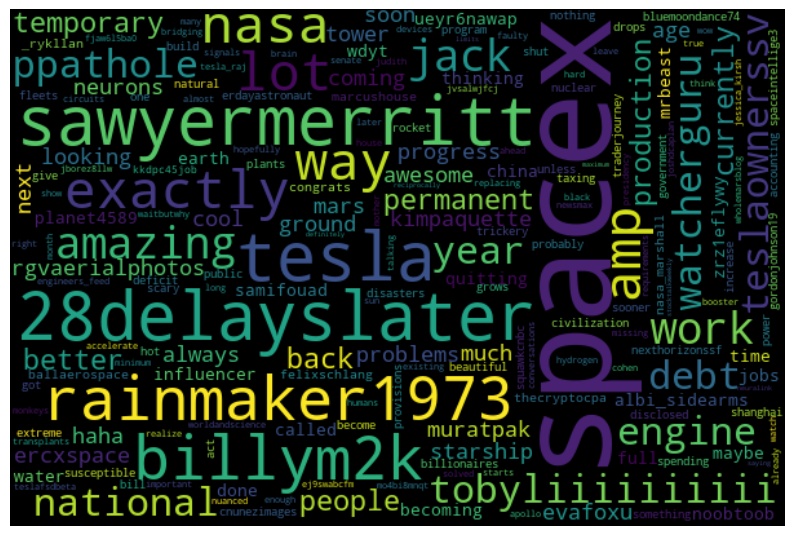

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

- Different style:

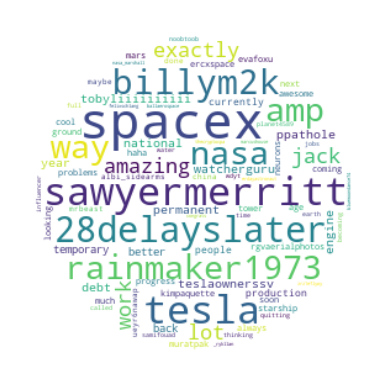

In [50]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [51]:
# download the package
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jankirenz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# tokenize the words
words_tokens = nltk.word_tokenize(all_words)

In [54]:
# use the function FreqDist and save the result as fd
fd = FreqDist(words_tokens)

In [55]:
words

['albi_sidearms',
 'maybe',
 'jack',
 'ueyr6nawap',
 'sawyermerritt',
 'sawyermerritt',
 'tesla',
 'china',
 'done',
 'amazing',
 'work',
 'mrbeast',
 'planet4589',
 'earth',
 'called',
 'water',
 'samifouad',
 'tobyliiiiiiiiii',
 'noobtoob',
 'thinking',
 'quitting',
 'jobs',
 'amp',
 'becoming',
 'influencer',
 'full',
 'time',
 'wdyt',
 'zrz1eflywy',
 'teslaownerssv',
 'billym2k',
 'thecryptocpa',
 'ballaerospace',
 'nasa_marshall',
 'nasa',
 'spacex',
 'congrats',
 '_rykllan',
 'spacex',
 'felixschlang',
 'marcushouse',
 'erdayastronaut',
 'bluemoondance74',
 'nexthorizonssf',
 'rocket',
 'fleets',
 'grows',
 'squawkcnbc',
 'gordonjohnson19',
 'rainmaker1973',
 'amazing',
 'engine',
 'cnunezimages',
 'spacex',
 'spaceintellige3',
 'rainmaker1973',
 'shanghai',
 'beautiful',
 'ppathole',
 'probably',
 'way',
 'sooner',
 'hot',
 'civilization',
 'unless',
 'susceptible',
 'extreme',
 'natural',
 'disasters',
 'nuclear',
 'power',
 'plants',
 'shut',
 'watcherguru',
 'taxing',
 'billi

In [56]:
fd

FreqDist({'spacex': 7, 'sawyermerritt': 5, 'tesla': 5, '28delayslater': 5, 'billym2k': 4, 'rainmaker1973': 4, 'amp': 3, 'nasa': 3, 'way': 3, 'exactly': 3, ...})

### Most common words

Find the 3 most common words by using the function `most_common(n=foo)` (foo is a placeholder).

Use the object `fd` to obtain the result

Save the result as `top_3`



In [66]:
# find the 3 most common words
### BEGIN SOLUTION
top_3 = fd.most_common(n=3)
### END SOLUTION

In [68]:
# Check your code
assert top_3 == [('spacex', 7), ('sawyermerritt', 5), ('tesla', 5)]

In [58]:
# show the 3 most common words as table
fd.tabulate(3)

       spacex sawyermerritt         tesla 
            7             5             5 


### Plot common words

In [59]:
# Obtain top 10 words
top_10 = fd.most_common(10)

top_10

[('spacex', 7),
 ('sawyermerritt', 5),
 ('tesla', 5),
 ('28delayslater', 5),
 ('billym2k', 4),
 ('rainmaker1973', 4),
 ('amp', 3),
 ('nasa', 3),
 ('way', 3),
 ('exactly', 3)]

In [60]:
# make a pandas datframe from the dictionary
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

value
28delayslater      5
amp                3
billym2k           4
exactly            3
nasa               3
rainmaker1973      4
sawyermerritt      5
spacex             7
tesla              5
way                3

In [61]:
# reset index to transform index to column
df_dist.reset_index(inplace=True)

df_dist

index  value
0  28delayslater      5
1            amp      3
2       billym2k      4
3        exactly      3
4           nasa      3
5  rainmaker1973      4
6  sawyermerritt      5
7         spacex      7
8          tesla      5
9            way      3

In [69]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

### Search specific words

In [70]:
# Show frequency of a specific word
fd["nasa"]

3